## CNN model for binary image classification

* The convolutional layers extract features from the images. They apply various filters to the input image to detect low-level features such as edges, lines, and simple textures in the initial layers. As we progress deeper into the network, these layers combine the low-level features to detect higher-level features like shapes or specific parts of objects.
* For example, in an image classification task for distinguishing cats and dogs, the first few convolutional layers might identify edges and textures, while deeper layers might recognize parts of faces like ears, eyes, or noses.
* Max pooling reduces the spatial dimensions (and thus computational load), and the dense layers perform classification based on these features.
* After passing through convolutional layers, we have a rich, yet complex, representation of the input image in terms of its higher-level features. However, these features by themselves might not be directly suitable for making a final decision (like classifying an image).
* This is where the dense layers come in. A dense layer takes all these high-level features and learns to identify which combinations of them are important for the specific task at hand.
* Continuing with the cat vs. dog classification example: a dense layer in the network will learn which combinations of high-level features (like the presence of pointy ears or a specific texture of fur) are most indicative of an image being a cat or a dog.
* The dense layer does this by learning a set of weights, where each weight represents the importance of one of these features in the context of the task. By applying non-linear transformations, it can combine these features in a complex and abstract way, which is necessary for tasks like classification.
* Imagine the network has learned to recognize ears, noses, and tails in its convolutional layers. In a dense layer, it might learn that a certain type of ear combined with a certain type of nose indicates a cat, while another combination indicates a dog. This learning involves non-linear transformations because the relationship between the presence of certain types of ears and noses and the resulting classification is not a simple, straight-line relationship (linear), but more complex.
* The use of ReLU activation helps to mitigate the vanishing gradient problem, and the sigmoid in the last layer is suitable for binary classification.

In [ ]:
!pip install opencv-python

##### imghdr is a python library used to determine the type of an image file based on it's header. (to identify/validate image files based on their content ather than their file extension)

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

This function is used to load image data from a directory structure and convert it into 'tf.data.Dataset' object.
The dataset object can be easily used for training models in TensorFLow.


In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

".as_numpy_iterator()" is a method of tf.data.Dataset object and is used to create an iterator from a Tensorflow dataset that yields the data as Numpy array.
Here, data_iterator is an iterator object that can be used to iterate over the dataset and yields Numpy Arrays.


In [ ]:
data_iterator = data.as_numpy_iterator()

In summary, batch = data_iterator.next() is a way to sequentially access batches of data from a dataset, with each batch being loaded into memory only when this line is executed. This approach is memory-efficient and is commonly used in training machine learning models, especially when dealing with large datasets that might not fit entirely in memory.

In [ ]:
batch = data_iterator.next()

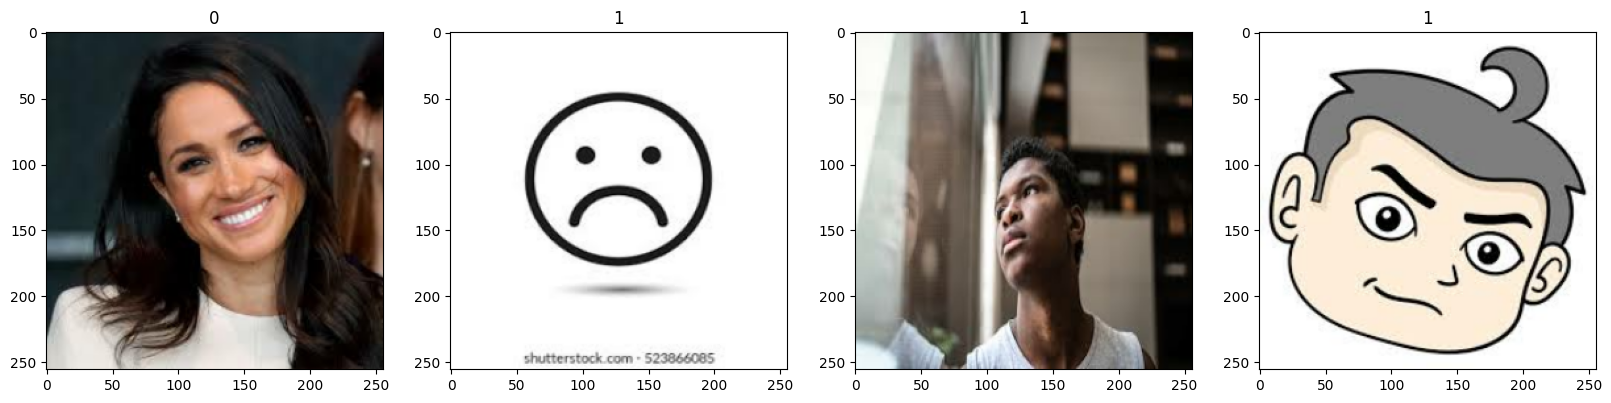

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

* map() is a method of TensorFlow dataset objects.
* It applies a given function to each element of the dataset.
The function is applied in a parallel manner, making this operation efficient and suited for large datasets.

* Normalization is an important preprocessing step in machine learning, especially in deep learning with neural networks, for several reasons, including faster training and reduced risk of overfitting:

* Faster Training: Scaled Gradient Descent: Neural networks use gradient descent as a core algorithm to minimize the loss function. If the input features are on very different scales, this can make the loss landscape very steep in some directions and shallow in others, which makes gradient descent less efficient. Normalization helps in scaling down the features (like pixel values) to a similar range, leading to a more uniform and smoother loss landscape. This uniformity helps the gradient descent algorithm converge faster.

* Better Weight Initialization: Neural networks are typically initialized with small random weights. If the input values are very large or very small, the gradients can either explode or vanish during the initial training epochs, making the network difficult to train. Normalized inputs help keep the gradients in a reasonable range.

* Reducing the Chance of Overfitting: Regularization Effect: Normalization can have a slight regularization effect. By ensuring that all input features (e.g., pixels in an image) have a similar scale, no single feature dominates the learning process, which can be the case when features have very different scales. This helps the model generalize better from the training data to unseen data.

* Preventing Saturation: Many activation functions used in neural networks, like the sigmoid or tanh, have regions where they 'saturate', meaning they become insensitive to small changes in their input (the gradients become very small). If the input data are not normalized, many neurons might operate in their saturation regime, which slows down learning due to small gradients and can also lead to overfitting. Normalized inputs help keep the activations in a range where the neuron is more sensitive to input changes.

* Uniformity Across Features: In image processing, normalizing pixel values so that they fall in the same range (e.g., 0-1) ensures that all input features (pixels) contribute equally to the computation in neural networks. Without normalization, the disparity in the range of pixel values might cause some pixels to disproportionately influence the network's learning, potentially skewing the model's performance.

        



In [ ]:
data = data.map(lambda x,y :(x/255, y))


In [ ]:
train_size = int(len(data)*.7)
val_size= int(len(data)*.2)
test_size= int(len(data)*.1)


In [ ]:
val_size

12

* The take() method in TensorFlow slices the first n elements from the dataset, where n is specified by train_size.

* The validation dataset is created by first skipping the initial train_size elements (which were taken by the training set) using the skip() method. Then, it takes the next val_size elements from the dataset.

* The validation set is used to tune hyperparameters and to provide an unbiased evaluation of a model fit on the training dataset.

* Similarly, the test dataset is created by skipping the elements that were included in the training and validation sets (train_size + val_size) and then taking the next test_size elements.



In [ ]:


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

* The Sequential class in Keras is a linear stack of layers. It's the simplest kind of model – a sequential model – which allows you to build neural networks layer by layer in a step-by-step fashion.
Each layer in a Sequential model has exactly one input tensor and one output tensor.

* model.add(Dense(64, activation='relu'))
* model.add(Dense(10, activation='softmax'))

* In this example, two layers are added: a Dense (fully connected) layer with 64 neurons and ReLU activation, and another Dense layer with 10 neurons and softmax activation, often used for multi-class classification.

* THIS IS MODEL INITIALIZATION.


In [ ]:
model = Sequential()

* 1st Conv. layer : 16 filters/kernals, each of size 3x3 with a stride set to 1.
* 1st Max Pooling layer : default pool size of (2x2) and stride 2 which reduces the spatial dimensions (height and width) of the output from the previous layer by half.
* Flatten layer : This layer flattens the multi-dimensional output from the previous layers into a one-dimension array, to feed into the dense layers.
* 1st Dense layer : 256 neurons. (***This layer is used for learning non-linear combinations of the high-level features extracted by the convolutional layers***.)
* final Dense layer : 1 neuron with sigmoid function.(***It's often used for binary classification problems. The sigmoid function outputs a value between 0 and 1, which can be interpreted as a probability.***)

In [ ]:
# Adding 3 Convolution layer with maxpooling and 2 Dense layer
model.add(Conv2D(16, (3,3),1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

* '.compile()' is used to **configure** the model for training. It specifies the optimizer, loss function, and metrics for the model.

* THIS IS MODEL CONFIGURATION

In [ ]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])


Parameters from Weights:
* Each neuron in a Dense layer is connected to all neurons in the previous layer.
* If the previous layer has N neurons (or input features), and the Dense layer itself has M neurons, then the number of weight parameters is N×M.

Parameters from Biases:
* If the Dense layer uses biases (which is the default case), each neuron in the Dense layer will have a bias term.
* Since there are M neurons in the Dense layer, this adds M bias parameters.

Total Parameters:
* Combining both weights and biases, the total number of parameters in the Dense layer is N×M+M.

Total parameters= ( Input features × Output neurons ) + Output neurons

  
    

Breakdown of Each Layer's Parameters
1. conv2d (Conv2D):

* This is a 2D convolutional layer with 16 filters, each of size 3x3, and the input shape is (256, 256, 3).
* Parameters in a Conv2D layer are calculated as: (filter_height * filter_width * input_channels + 1) * number_of_filters
* Here, it would be (3 * 3 * 3 + 1) * 16 = 448
* The +1 is for the bias term for each filter.

2. max_pooling2d (MaxPooling2D):

* MaxPooling layers do not have learnable parameters; they are used for downsampling.
* Hence, 0 parameters.

3. conv2d_1 (Conv2D):

* This layer has 32 filters, each of size 3x3.
* The number of input channels for this layer is the same as the number of filters in the previous Conv2D layer, which is 16.
* Parameters = (3 * 3 * 16 + 1) * 32 = 4640

4. max_pooling2d_1 (MaxPooling2D):

* Again, no parameters.

5. conv2d_2 (Conv2D):

* This layer has 16 filters, each of size 3x3.
* The number of input channels is the number of filters in the previous Conv2D layer, which is 32.
* Parameters = (3 * 3 * 32 + 1) * 16 = 4624

6. max_pooling2d_2 (MaxPooling2D):

* No parameters.

7. flatten (Flatten):

* Flattening doesn't involve learnable parameters. It just reshapes the data.
* However, it determines the input size for the next dense layer.

8. dense (Dense):

* This is a fully connected layer with 256 units.
* The input size is determined by the output of the flatten layer.
* After the last MaxPooling2D, the output size is 30x30x16.
* Flattened, it becomes 303016 = 14400.
* Parameters in a Dense layer are calculated as: (input_units * output_units + output_units)
* Here, it would be (14400 * 256 + 256) = 3686656

9. dense_1 (Dense):

* This dense layer has 1 unit (for binary classification).
* The input size is the output size of the previous dense layer, which is 256.
* Parameters = (256 * 1 + 1) = 257

Total Parameters

* Summing these up: 448 (Conv2D) + 0 (MaxPooling) + 4640 (Conv2D) + 0 (MaxPooling) + 4624 (Conv2D) + 0 (MaxPooling) + 0 (Flatten) + 3686656 (Dense) + 257 (Dense) = 3696625

* This total represents the learnable parameters in your model.
* Each parameter is a value that the network will adjust during training to better fit your data.
* The total size of the model is about 14.10 MB, mostly due to the dense layers, which are generally parameter-heavy due to their fully connected nature.

* "Non-trainable parameters" refer to the parameters (weights) in the model that are not updated during training through backpropagation.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:


logdir ='logs'



In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

* The train variable should be a TensorFlow dataset or a data generator that yields batches of input data and labels
* An epoch is one complete pass through the entire training dataset. epochs=20 means the training process will iterate over the entire dataset 20 times.More epochs can lead to better learning, but also increase the risk of overfitting.
* The validation dataset is not used for training. Instead, the model is evaluated on this dataset after each epoch to monitor its performance on data it hasn't seen during training.
This helps in understanding how well the model generalizes and is crucial for preventing overfitting.
*  Callbacks in Keras are a set of functions to be applied at given stages of the training process. They provide a way to insert custom functionality into the training process.
* tensorboard_callback is a specific callback that integrates with TensorBoard, a visualization tool provided by TensorFlow. It allows you to monitor the training process in a more detailed and visual way. By including this callback, you can track various metrics like loss, accuracy, and other custom metrics in TensorBoard during and after training.
* The output of model.fit is typically stored in a variable, in this case, hist. This object is a history object that contains the training and validation loss and accuracy for each epoch. It's useful for analyzing the training process after it's complete.

* The notation 44/44 refers to the number of batches processed during an epoch.
* When training a neural network using mini-batch gradient descent, the training data is divided into smaller subsets called batches. Each batch is passed through the network, which then updates its parameters (weights and biases) based on the error for that batch.
* The total number of times the parameters are updated (also known as the **number of training iterations**) can be calculated by multiplying the number of epochs by the number of mini-batches per epoch.
* Number of epochs = 10
* Number of mini-batches per epoch = 44
* = 10 × 44 = 440



In [ ]:
hist = model.fit(train,epochs = 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 189s 4s/step - loss: 0.7043 - accuracy: 0.5625 - val_loss: 0.6713 - val_accuracy: 0.5833
Epoch 2/20
44/44 [==============================] - 20s 450ms/step - loss: 0.6555 - accuracy: 0.6214 - val_loss: 0.6613 - val_accuracy: 0.5990
Epoch 3/20
44/44 [==============================] - 19s 409ms/step - loss: 0.6342 - accuracy: 0.6087 - val_loss: 0.6297 - val_accuracy: 0.6224
Epoch 4/20
44/44 [==============================] - 18s 400ms/step - loss: 0.5842 - accuracy: 0.6839 - val_loss: 0.6556 - val_accuracy: 0.5885
Epoch 5/20
44/44 [==============================] - 18s 403ms/step - loss: 0.5132 - accuracy: 0.7358 - val_loss: 0.6654 - val_accuracy: 0.6328
Epoch 6/20
44/44 [==============================] - 20s 438ms/step - loss: 0.4539 - accuracy: 0.7834 - val_loss: 0.6712 - val_accuracy: 0.6693
Epoch 7/20
44/44 [==============================] - 20s 445ms/step - loss: 0.3508 - accuracy: 0.8452 - val_loss: 0.6706 - val_accuracy: 0.7292
E

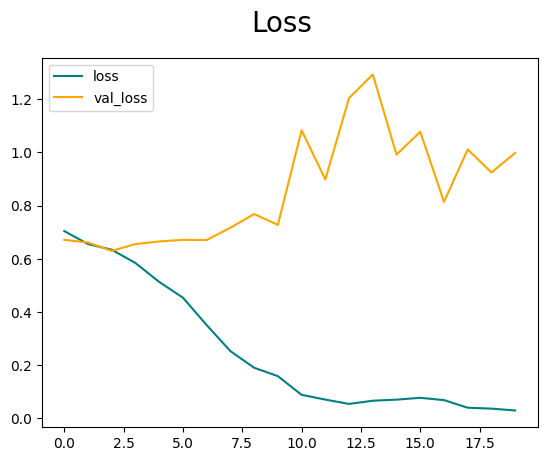

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


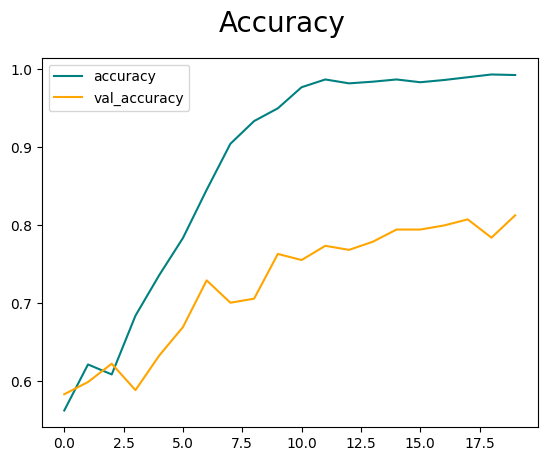

In [ ]:


fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()




In [ ]:


from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy



In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [ ]:


for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)



1/1 [==============================] - 0s 34ms/step


In [ ]:


print(pre.result(), re.result(), acc.result())



tf.Tensor(0.7473684, shape=(), dtype=float32) tf.Tensor(0.73195875, shape=(), dtype=float32) tf.Tensor(0.7395833, shape=(), dtype=float32)


In [ ]:


import cv2



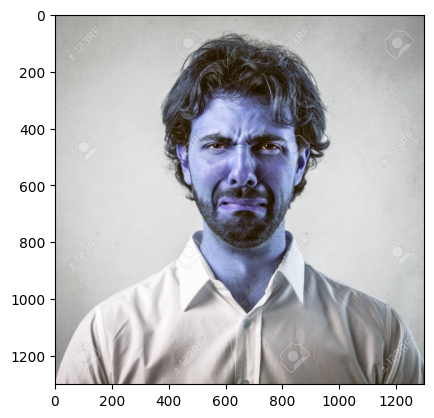

In [ ]:

img = cv2.imread('/content/39843138-sad-man.jpg')
plt.imshow(img)
plt.show()



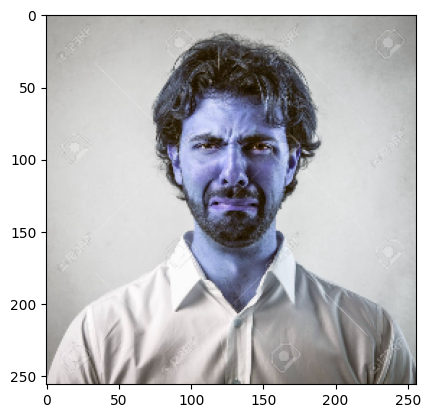

In [ ]:


resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()



In [ ]:


yhat = model.predict(np.expand_dims(resize/255, 0))



1/1 [==============================] - 0s 152ms/step


In [ ]:
yhat

array([[0.96051097]], dtype=float32)

In [ ]:


if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')



Predicted class is Sad


In [ ]:


from tensorflow.keras.models import load_model



In [ ]:
model.save(os.path.join('models','Facial_image_classifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('models/Facial_image_classifier.h5')


In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 112ms/step


array([[0.96051097]], dtype=float32)

### Loss Graph Analysis

* The first image is a plot of the loss function values for both the training set (loss) and the validation set (val_loss) over epochs (iterations of training).

* Decreasing Training Loss: The loss line (teal) decreases smoothly, which suggests that the model is learning and improving its predictions over time on the training set.

* Fluctuating Validation Loss: The val_loss line (orange) initially decreases but then fluctuates, indicating that the model’s performance on the validation set is less stable. This could be a sign of overfitting, where the model learns patterns specific to the training data that do not generalize well to unseen data.

* Divergence: There is a divergence between the loss and val_loss, with the training loss continuing to decrease while the validation loss increases and fluctuates. This is a classic sign of overfitting.

### Accuracy Graph Analysis

* The second image is a plot of the accuracy metrics for both the training set (accuracy) and the validation set (val_accuracy) over epochs.

* High Training Accuracy: The accuracy line (teal) quickly rises and reaches a plateau near 100%, which suggests that the model is very accurate on the training data.
* Lower Validation Accuracy: The val_accuracy line (orange) also increases but levels off at a lower value than the training accuracy, which typically means the model is not performing as well on the validation set as on the training set.
Gap Between Accuracies: The noticeable gap between accuracy and val_accuracy suggests that the model might be overfitting to the training data and not generalizing well to new, unseen data.

### Conclusions based on these graphs:

* Overfitting: The model is likely overfitting the training data. While it performs well on data it has seen before, its ability to predict new data accurately is not as good.
* Model Complexity: The model might be too complex and could benefit from regularization techniques or a simpler architecture to improve its generalization.
* Further Training Unlikely to Help: Continuing to train the model in its current form is unlikely to lead to improvements in validation performance and might exacerbate overfitting.
* Data Augmentation or More Data: If this performance is not satisfactory, you might consider data augmentation, gathering more varied or more training data, or using techniques like dropout to improve model generalization.
* Early Stopping: Implementing early stopping, where training is halted once validation performance degrades, might be beneficial to prevent overfitting.

##### The ultimate goal is to minimize the gap between training and validation performance, which would indicate that the model generalizes well to new data.

* "Non-trainable parameters" refer to the parameters (weights) in the model that are not updated during training through backpropagation.
* Several reasons including :     
* Frozen layers : sometimes, layers in a NN are frozen or set as non-trainable, especially in transfer learning scenarios.
* Batch Normalization Layers in Inference Mode : In layers like Batch Normalization, some parameters (like the mean and variance used for normalization) are learned during training but are not updated during the training of a new model when the Batch Normalization layer is used. These parameters are fixed during the inference (prediction) phase.
* Regularization Layers : Certain types of layers or wrappers introduce parameters that are not directly involved in the forward pass for generating predictions but are used for regularization purposes. These might be counted as non-trainable if they are not updated in the typical training process.

## Transfer Learning vs Fine-tuning
* Transfer learning is a ML method where a model developed for one task is reused as the starting point for a model on a second task. It's popular approach in deep learning where large models are trained on large dataset (like ImageNet) and then reused for a different but related problem.
* In transfer learning, you start with a pre-trained model and then adapt it to your specific task. This adaptation can involve several strategies, including ***fine-tuning***.

* Fine-tuning is a process that is a part of transfer learning.
* The goal of fine-tuning is to adjust the pre-trained model's weights slightly so that it can adapt to the new task. This process is necessary because the specifics of the new task might not be perfectly aligned with what the model learned in its original training.
* During fine-tuning, you typically:
* -> Either freeze the weights of the initial layers of the pre-trained model(since they capture more generic features) and only train some of the last layers on the new task.
* -> Or train the entire model (all layers) on the new task, but with a lower learning rate to make small adjustments to the weights.